# Tutorial for Epidemic Dynamics Modelling

**Authors:** Souvik Manik, Sabyasachi Pal, Manoj Mandal

**Prerequisites:** Epitools, Numpy, Pandas, sklearn, matplotlib 

**Description:** ``EpiDynamicsModel`` class of our package can be used for efficient modelling and prediction of epidemic scenarios. For the epidemic dynamics modelling, we proposed a two-step modelling procedure where, in the first step, time-dependent transmission coefficients ($\beta, \gamma, \delta$) and effective reproduction number ($R_t$) are computed directly from the real-time data, and in the second step, numerical statistics of those models are used for fitting models to forecast future movements of various driving parameters. We also implimented time-dependent contact rate with different decay functions (``polynomial, exponential, power, tanh, and logistic``) for those dynamics models (``SIR, SIRD, SEIR, SEIRD``) to fit real-time data during any interventions from when the transmission is decaying . ``estimate_tc`` class can be used to estimate real-time transmission coefficients and reproduction numbers from epidemic data. Moreover, $estimate_r$ class can also be used to estimate $R_t$ from infected data using the Kalman filtering technique.

![title](covid_model.png)

## Available epidemiological models in ``Epitools``

### SIR model

 To study the transmission of infectious diseases into a large number of people, there are several models. The most basic compartmental model for explaining the evolution of an outbreak at the population level is the Susceptible-Infected-Recovered (SIR) model. When the maternal antibodies no longer exist in the body, the infant is classified as susceptible ($S$). When a susceptible person comes into enough contact with an infective to facilitate transmission, the person is categorized as a member of an infected class ($I$), which means they are infectious and they may transmit the virus. When the infection period ends, the individual enters the recovered class ($R$), which consists of those who have infection-acquired immunity.

 The classic SIR model assume that the infected ($I$) and susceptible ($S$) populations are homogeneously mixed and the total population $N$ remains constant over the study. Also, the susceptible population ($S$) in the SIR model drops monotonically towards zero. It is assumed that the SIR model's time scale is short enough that non-virus-related births and deaths may be ignored and that the number of virus-related fatalities is modest in contrast to the entire population.
 
SIR model can be used to investigate various epidemic driving factors such as recovery rate ($\gamma$), contact rate ($\beta$), and effective reproduction number ($\mathbb{R})$. At any given time $t$, let $S(t)$ (total population -- confirmed), $I(t)$ (confirmed -- recovered -- deceased), and $R(t)$ (recovered + deceased) be the total number of susceptible individuals, infected individuals, and recovered individuals, respectively.

These parameters can be expressed in fractional form as:
$$
s(t)=\frac{S(t)}{N}, i(t)=\frac{I(t)}{N}, r(t)=\frac{R(t)}{N}
$$
From the conservation law,
$$
s(t)+i(t)+r(t)=1 
$$     
The SIR model is represented by the following set of differential equations:
$$
\frac{ds(t)}{dt} =  -\beta(t) s(t) i(t)   
$$
$$
\frac{di(t)}{dt} = \beta(t) s(t) i(t) - \gamma(t) i(t)  
$$
$$
\frac{dr(t)}{dt} = \gamma(t) i(t)     
$$
We can write from equation 4,
$$
\beta_n = \frac{1}{s_n i_n }[i_{n+1} - (1- \gamma_n )i_n ]
$$
The effective reproduction number $\mathbb{R}_t$ can be computed from this equation. 
$$
\mathbb{R}_t = \frac{\beta_n}{\gamma_n} 
$$ 
		
The variation of recovery rate ($\gamma_n$), contact rate ($\beta_n$), and effective reproduction number ($\mathbb{R}_t$ can be studied using {\tt Epitools}).

### SIRD model

The Susceptible-Infectious-Recovered-Deceased (SIRD) is a modified version of  SIR model, with separate compartments for deceased and recovered individuals. At any given time $t$, $S(t) $(total population---confirmed), $I(t) $(confirmed---recovered---deaths), $R(t)$(recovered), and $D(t) $(deaths) represent the total number of susceptible, infected, and recovered individuals, respectively, and $N$ represents the total population, which is assumed to remain constant throughout the study. Using this model, we have fitted the epidemic data and also computed time-dependent transmission coefficients, i.e., the recovery rate ($\gamma_n$), contact rate ($\beta_n$), mortality rate ($\delta_n$), and effective reproduction number ($\mathbb{R}_t$).  
               
$s(t)$, $i(t)$, $r(t)$ and $d(t)$ can be expressed in fractional form:
$$
s(t)=\frac{S(t)}{N}, i(t)=\frac{I(t)}{N}, r(t)=\frac{R(t)}{N}, d(t)=\frac{D(t)}{N}
$$
From the conservation law,
$$
s(t)+i(t)+r(t)+d(t)=1 
$$
The SIRD model can be expressed by following a set of differential equations.
$$
\frac{ds(t)}{dt} =  -\beta(t) s(t) i(t)   
$$
$$
\frac{di(t)}{dt} = \beta(t) s(t) i(t) - [\gamma(t)+\alpha(t)] i(t)  
$$
$$
\frac{dr(t)}{dt} = \gamma(t) i(t)     
$$
$$
\frac{dd(t)}{dt} = \alpha(t) i(t)     
$$
From equation 11, we may write
$$
\beta_n = \frac{1}{s_n i_n }[i_{n+1} + (\gamma_n + \alpha_n - 1)i_{n}]% + (\sigma - 1)(\gamma_n - 1)i_n]
$$
The effective reproduction number $\mathbb{R}_t$ can be expressed as
$$
\mathbb{R}_t = \frac{\beta_n}{\gamma_n+\alpha_n} 
$$


### SEIR model
The Susceptible-Exposed-Infectious-Removed (SEIR) class of models are some of the widely studied ones. As an epidemic spreads, at a certain time $t$, let $S (t) $, $E (t) $, $I (t) $, and $R(t)$ be the total number of susceptible, exposed, infected, and removed individuals (recovered or deceased), respectively, and let $N$ represent the total population, which is assumed to remain constant throughout the study. In the SEIR model, the exposed compartment is an extension of the SIR model. The inclusion of exposed individuals ($E$) in the SEIR model improves the model's efficiency. An epidemic spreads when  susceptible person interact with an infectious person, after that the susceptible enters the exposed compartment ($E$) of those infected but not yet infectious during the latent phase 1/$\sigma$. At the end of the latent phase, the individual enters the compartment ($I$) and is capable of transmitting the infection. After the infection phase is over, the individuals enter compartment $R$. Here, $\beta_n$, $\gamma_n$, and $\mathbb{R}_t$ are the effective contact rate, recovery rate, and effective reproduction number of the epidemic, respectively. The model assumes that recovered individuals from the disease cannot become susceptible again. Using the SEIR model, one can estimate different time-dependent driving parameters from epidemic data with the help of {\tt Epitools} using the average incubation period of $1/\sigma$ (= 7) as a constant.

$s(t)$, $e(t)$, $i(t)$ and $r(t)$ can be expressed in fractional form: \\
$$
s(t)=\frac{S(t)}{N}, e(t)=\frac{E(t)}{N},  i(t)=\frac{I(t)}{N}, r(t)=\frac{R(t)}{N}
$$
From the conservation law, we may write:
$$
s(t)+e(t)+i(t)+r(t)=1 
$$
The SEIR model can be expressed by following a set of differential equations
$$
\frac{ds(t)}{dt} =  -\beta(t) s(t) i(t)   
$$
$$
\frac{de(t)}{dt} =  \beta(t) s(t) i(t)  - \sigma e(t)   
$$
$$
\frac{di(t)}{dt} = \sigma e(t) - \gamma(t) i(t)  
$$
$$
\frac{dr(t)}{dt} = \gamma(t) i(t)     
$$
Now we use equation (19) to find $\beta_n$  
$$
\beta_n = \frac{e_{n+1}-e_n+\sigma e_n}{s_ni_n}  
$$
Using equations 19, 20, and 22 we can write \\
$$
\label{23}
\beta_n = \frac{1}{s_n i_n \sigma}[i_{n+2} + (\gamma_n + \sigma - 2)i_{n+1} + (\sigma - 1)(\gamma_n - 1)i_n]
$$
The effective reproduction number $\mathbb{R}_t$ can be expressed from this equation.
$$
\label{24}
\mathbb{R}_t = \frac{\beta_n}{\gamma_n} 
$$ 

### SEIRD model

The Susceptible-Exposed-Infected-Recovered-Deceased (SEIRD) model is the extended version of the SEIR model. At any time $t$, $S(t)$ be the total number of susceptible individuals, $E(t)$ be the total number of exposed individuals, $I(t)$ be the total number of infected individuals, $R(t)$ be the total number of recovered individuals, and $D(t)$ be the total number of deceased individuals from the epidemic. In the SEIRD model, we have considered the average incubation period $1/\sigma$ to be a constant. We presume that the individuals who recovered from the disease will not become susceptible again. The exposed ($E$) compartment in the SEIRD model is an extension of the SIRD model. The susceptible ($S$) moves into the exposed compartment ($E$) when a susceptible individual comes across significant interaction with an infective individual ($I$). The individual enters class $I$ at end of latent phase and becomes capable of spreading the infection. Finally, at the end of the infectious time, the person moves to either the recovered compartment $R$ or the deceased compartment $D$.

The parameter $\beta$ is the product of the average number of contacts per person and per unit of time by the probability of disease transmission in contact between susceptible and infectious individuals. $\gamma$ is the recovery rate, and $\delta$ is the mortality rate. The compartment $E$ of the exposed individuals in the SEIRD model makes the model slightly more delicate.

The SEIRD model is used widely to understand transmission dynamics of infectious diseases over large population. If $N$ is the total population size, then in fraction form
$$
s(t)=\frac{S(t)}{N}, e(t)=\frac{E(t)}{N}, i(t)=\frac{I(t)}{N}, r(t)=\frac{R(t)}{N}, d(t)=\frac{D(t)}{N}
$$
From the total number of individuals conservation, we have the relation\\
$$
s(t)+e(t)+i(t)+r(t)+d(t)=1
$$
These quantities change by discrete amounts but if the minimal possible change is relatively low, we can consider $s(t)$, $i(t)$, $r(t)$, and $d(t)$ as differentiable functions.
 For any time $t \geq 0$, the SEIRD model can be  expressed by the differential equations
$$
\frac{ds(t)}{dt} =  -\beta(t) s(t) i(t)   
$$
$$
\frac{de(t)}{dt} =  \beta(t) s(t) i(t)  - \sigma e(t)   $$
$$
\frac{di(t)}{dt} = \sigma e(t) - [\gamma(t) + \delta(t)]i(t)
$$
$$
\frac{dr(t)}{dt} = \gamma(t) i(t)     
$$
$$
\frac{dd(t)}{dt} = \delta(t) i(t)  
$$

We use the discrete form of equations (13) to (17).

We use equation (14) to find $\beta_n$  
$$
\beta_n = \frac{e_{n+1}-e_n+\sigma e_n}{s_ni_n}  
$$

We use equation (16) to find $\gamma_n$
$$
\gamma_n = \frac{r_{n+1}-r_n}{i_n} 
$$

Now we use equation (17) to find $\delta_n$
$$
\delta_n = \frac{d_{n+1}-d_n}{i_n} 
$$

The effective reproduction number $\mathbb{R}_t$ can be given by 
 $$
  \mathbb{R}_t = \frac{\beta_n}{\gamma_n+\delta_n} 
$$

**Let's import all the essential libraries first**

In [1]:
#import essential libratries
import pandas as pd 
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from epitools.estimate_tc import tcoeff
from sklearn.metrics import r2_score
from epitools.optimizer import Minimizer

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#read the epidemic data, here we are using a test data hosted on github
df = pd.read_csv('https://raw.githubusercontent.com/souvikmanik/covid_data/main/india.csv')
df.head(4)

,Unnamed: 0,date,Confirmed,Recovered,Death
0,2021-02-01,2021-02-01,10766245,10448406,154486
1,2021-02-02,2021-02-02,10777284,10462631,154596
2,2021-02-03,2021-02-03,10790183,10480455,154703
3,2021-02-04,2021-02-04,10802591,10496308,154823


## Two-step aproach for epidemiological modeling using ``Epitools``
### 1. Estimation of real-time transmission coefficients and reproduction numbers from epidemic data using ``estimate_tc`` class

``estimate_tc`` take timeseries dataframe with should consist of Date, Confirmed, Recovered, 
       Death columns. So we first change the columnname of our data as ``estimate_tc`` wants.

In [3]:
df=df.rename(columns={"date": "Date"})
df.head(2)

,Unnamed: 0,Date,Confirmed,Recovered,Death
0,2021-02-01,2021-02-01,10766245,10448406,154486
1,2021-02-02,2021-02-02,10777284,10462631,154596


``tcoeff`` class have two methods/functions

1. ``get_tcoeff``, which can be used to estimate real time transmission coefficients and effective reproduction number, $R_t$ from the epidemic timeseries.It can be executed as follows.
2. ``numstats``, which can be used to find a tabulated numerial statistics from the output of ``get_tcoeff``

In [4]:
tc = tcoeff(df)

"""
usage: get_tcoeff(model), where model is the available models in epitools 
to estimate real time transmission coefficients and effective reproduction 
number, 𝑅𝑡 from the epidemic timeseries. 
Available models: SIR, SIRD, SEIR, SEIRD
**for SEIR/SEIRD model you have to provide an additional constant argument as incubation period, 𝜎. 
for more details refer to:
https://doi.org/10.1016/j.envres.2022.113110
https://doi.org/10.1007/s11071-021-07041-7
"""

da=tc.get_tcoeff("SIRD")
print(da.head(2))

         Date      beta     gamma        Rt     delta
1  2021-02-02  0.068969  0.088875  0.770073  0.000687
2  2021-02-03  0.083206  0.114975  0.719369  0.000690


In [5]:
#Now let's see the numerical statistics of the output
tc.numstats()

+---------------------------------------------------+
|    Summary statistics of all numerical columns:   |
+-------+----------+----------+----------+----------+
|       |     beta |    gamma |       Rt |    delta |
|-------+----------+----------+----------+----------|
| count | 183      | 183      | 183      | 183      |
| mean  |   0.1004 |   0.0949 |   1.1274 |   0.0013 |
| std   |   0.0236 |   0.0205 |   0.4587 |   0.001  |
| min   |   0.0634 |   0.0591 |   0.4691 |   0.0004 |
| 25%   |   0.0815 |   0.0784 |   0.7391 |   0.0007 |
| 50%   |   0.0946 |   0.0923 |   1.0254 |   0.001  |
| 75%   |   0.1201 |   0.111  |   1.3768 |   0.0016 |
| max   |   0.1931 |   0.1839 |   2.2228 |   0.0098 |
+-------+----------+----------+----------+----------+
Thank you for using epitools! 
-----------------------------


Now let's do another example with incubation period sigma as 7 days with SEIRD model

In [6]:
tca = tcoeff(df)
sigma = 7
db = tca.get_tcoeff("SEIRD",sigma)
print(da.head(2))

         Date      beta     gamma        Rt     delta
1  2021-02-02  0.068969  0.088875  0.770073  0.000687
2  2021-02-03  0.083206  0.114975  0.719369  0.000690


In [7]:
#Now let's see the numerical statistics of the output
tca.numstats()

+---------------------------------------------------+
|    Summary statistics of all numerical columns:   |
+-------+----------+----------+----------+----------+
|       |     beta |    gamma |       Rt |    delta |
|-------+----------+----------+----------+----------|
| count | 182      | 182      | 182      | 182      |
| mean  |   0.1138 |   0.0949 |   1.2932 |   0.0013 |
| std   |   0.1506 |   0.0206 |   1.4399 |   0.001  |
| min   |  -0.5763 |   0.0591 |  -6.5134 |   0.0004 |
| 25%   |   0.0478 |   0.0783 |   0.4477 |   0.0007 |
| 50%   |   0.0982 |   0.0924 |   1.0605 |   0.0011 |
| 75%   |   0.178  |   0.1111 |   2.0108 |   0.0016 |
| max   |   1.5451 |   0.1839 |   8.2836 |   0.0098 |
+-------+----------+----------+----------+----------+
Thank you for using epitools! 
-----------------------------


Let's visualize the result,

xxxx

### 2. Fitting and prediction of Epidemic scenarios using ``EpiDynamicsModel`` class of ``Epitools``
Let's prepare data for feeding to ``EpiDynamicsModel`` first

In [8]:
df['removed'] = df['Death'] + df['Recovered']
df['infected'] = df['Confirmed'] - df['removed']
data = df[['infected','Recovered','Death']].copy()
data = data [data['infected'] > 25]
data = data.iloc[40:90]
N=1391197718

**Now define the initial points of different parameters of models. For first example we choose SIRD model to solve, fitting and prediction.**

In [9]:
E0 = 3 * data.iloc[0]['infected']
I0 = data.iloc[0]['infected']
R0 = data.iloc[0]['Recovered']
D0 = data.iloc[0]['Death']
Y0={'N':N,'I0':I0,'R0':R0,'D0':D0}
# let's define initial points and bounds for beta, gamma, delta 
starting_point = 0.01,0.01,0.01
bounds = [(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0)]

In [10]:
L = Minimizer ('SIRD')
L.initialize  (starting_point,bounds,**Y0)
optm = L.fit(data)
params = ["%.6f" % x for x in L.params]
#print("params [gamma,beta_0,alpha,mu,tl]:",params,"loss=","%.3f" % optm.fun)
d = L.simulate()
m = L.forecast(20)
days=[int(i) for i in range(0, len(data))]
#let's see the best fit parameters
L.get_params

3
INFO:root:L-BFGS-B optimization started: 2023-12-20 23:51:35.041674
INFO:root:Elapsed time: 0.4287s
SIRD model normalized parameters 
------------------------------------ 

Parameter	Value
---------	-----
gamma	    0.07988
delta	    0.00087
beta 	    0.14099
Rt   	    1.74588
------------------------------------ 
Thank you for using epitools!


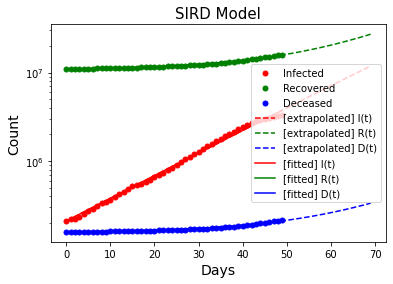

In [11]:
plt.figure(figsize=(6,4))
plt.title('SIRD Model',fontsize=15)
plt.plot(days, data['infected'],'.',markersize=10,c='r',label='Infected')
plt.plot(days, data['Recovered'],'.',markersize=10,c='g',label='Recovered')
plt.plot(days, data['Death'],'.',markersize=10,c='b',label='Deceased')
plt.plot(m.y[1], '--',c='r',label='[extrapolated] I(t)')
plt.plot(m.y[2], '--',c='g',label='[extrapolated] R(t)')
plt.plot(m.y[3], '--',c='b',label='[extrapolated] D(t)')
plt.plot(d.y[1],c='r',label='[fitted] I(t)')
plt.plot(d.y[2],c='g',label='[fitted] R(t)')
plt.plot(d.y[3],c='b',label='[fitted] D(t)')
plt.yscale('log')
plt.xlabel('Days', fontsize=14) 
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

**Now define the initial points of different parameters of models. Now we are choosing example using SEIRD model to solve, fit and prediction.**

In [12]:
E0 = 3 * data.iloc[0]['infected']
I0 = data.iloc[0]['infected']
R0 = data.iloc[0]['Recovered']
D0 = data.iloc[0]['Death']
Y0={'N':N,'E0':E0,'I0':I0,'R0':R0,'D0':D0}
#let's define the initial values and bounds of beta, sigma, gamma, delta
starting_point = 0.01,0.01,0.01,0.01
bounds = [(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0)]

In [13]:
L = Minimizer ('SEIRD')
L.initialize  (starting_point,bounds,**Y0)
optm = L.fit(data)
params = ["%.6f" % x for x in L.params]
#print("params [gamma,beta_0,alpha,mu,tl]:",params,"loss=","%.3f" % optm.fun)
d = L.simulate()
m = L.forecast(20)
days=[int(i) for i in range(0, len(data))]
L.get_params

4
INFO:root:L-BFGS-B optimization started: 2023-12-20 23:51:36.525034
INFO:root:Elapsed time: 0.6901s
SEIRD model normalized parameters 
------------------------------------ 

Parameter	Value
---------	-----
sigma	    0.05753
gamma	    0.07583
delta	    0.00083
beta 	    0.26162
Rt   	    3.41273
------------------------------------ 
Thank you for using epitools!


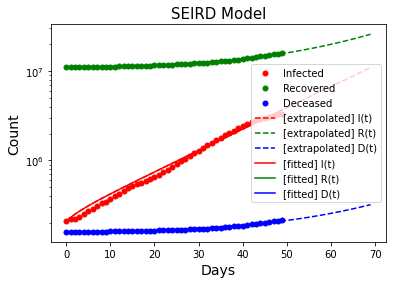

In [14]:
plt.figure(figsize=(6,4))
plt.title('SEIRD Model',fontsize=15)
plt.plot(days, data['infected'],'.',markersize=10,c='r',label='Infected')
plt.plot(days, data['Recovered'],'.',markersize=10,c='g',label='Recovered')
plt.plot(days, data['Death'],'.',markersize=10,c='b',label='Deceased')
plt.plot(m.y[2], '--',c='r',label='[extrapolated] I(t)')
plt.plot(m.y[3], '--',c='g',label='[extrapolated] R(t)')
plt.plot(m.y[4], '--',c='b',label='[extrapolated] D(t)')
plt.plot(d.y[2],c='r',label='[fitted] I(t)')
plt.plot(d.y[3],c='g',label='[fitted] R(t)')
plt.plot(d.y[4],c='b',label='[fitted] D(t)')
plt.yscale('log')
plt.xlabel('Days', fontsize=14) 
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

**As an epidemic evolves, various control measures are introduced, such as lockdown, social distancing, and improved hygiene, which causes** $\beta$ **to become time-independent. The epidemiological model with constant transmission coefficients is only applicable to the situation when an epidemic is allowed to evolve without any interruption. In our paper we also modified the general epidemiological models using time-dependent contact rate** ($\beta$) **models (exponential and tanh) to capture the transmission dynamics of a virus more precisely.**

**For more details refer to:**

https://doi.org/10.1016/j.envres.2022.113110

https://doi.org/10.1007/s11071-021-07041-7

**Available time-dependent $\beta$ models:** polynomial, exponential, tanh 

Now we try an example with (epidemiological + time-dependent $\beta$) model

***Example-1:*** Fitting and prediction with (SIRD+Exponential) model

**Now define the initial points of different parameters of models. Now we are choosing example using (SIRD+exp) model to solve, fit and prediction.**

In [15]:
E0 = 3 * data.iloc[0]['infected']
I0 = data.iloc[0]['infected']
R0 = data.iloc[0]['Recovered']
D0 = data.iloc[0]['Death']
Y0={'N':N,'I0':I0,'R0':R0,'D0':D0}
#let's define the initial values and bounds of gamma, delta, beta_0, alpha,mu,tl
starting_point = 0.01,0.05,0.04,0.0,0.0,30
bounds = [(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0), (0, len(data))]

In [16]:
L = Minimizer ('SIRD', 'exp')
L.initialize  (starting_point,bounds,**Y0)
optm = L.fit(data)
params = ["%.6f" % x for x in L.params]
#print("params [gamma,beta_0,alpha,mu,tl]:",params,"loss=","%.3f" % optm.fun)
d = L.simulate()
m = L.forecast(20)
days=[int(i) for i in range(0, len(data))]
L.get_params

6
INFO:root:L-BFGS-B optimization started: 2023-12-20 23:51:37.883061
INFO:root:Elapsed time: 4.5675s
SIRD+exp model normalized parameters 
------------------------------------ 

Parameter	Value
---------	-----
gamma	    0.07631
delta	    0.00083
beta_0	    0.13871
alpha	    0.12213
mu   	    0.04203
tl   	   38.91308
Rt   	    1.21005
------------------------------------ 
Thank you for using epitools!


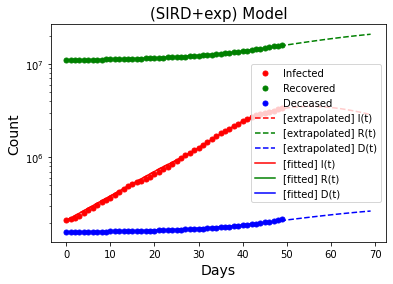

In [17]:
plt.figure(figsize=(6,4))
plt.title('(SIRD+exp) Model',fontsize=15)
plt.plot(days, data['infected'],'.',markersize=10,c='r',label='Infected')
plt.plot(days, data['Recovered'],'.',markersize=10,c='g',label='Recovered')
plt.plot(days, data['Death'],'.',markersize=10,c='b',label='Deceased')
plt.plot(m.y[1], '--',c='r',label='[extrapolated] I(t)')
plt.plot(m.y[2], '--',c='g',label='[extrapolated] R(t)')
plt.plot(m.y[3], '--',c='b',label='[extrapolated] D(t)')
plt.plot(d.y[1],c='r',label='[fitted] I(t)')
plt.plot(d.y[2],c='g',label='[fitted] R(t)')
plt.plot(d.y[3],c='b',label='[fitted] D(t)')
plt.yscale('log')
plt.xlabel('Days', fontsize=14) 
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

**Example-2:** Fitting and prediction with (SEIRD+tanh) model

**Now define the initial points of different parameters of models. Now we are choosing example using (SEIRD+tanh) model to solve, fit and prediction.**

In [18]:
E0 = 0.1 * data.iloc[0]['infected']
I0 = data.iloc[0]['infected']
R0 = data.iloc[0]['Recovered']
D0 = data.iloc[0]['Death']
Y0={'N':N,'E0':E0,'I0':I0,'R0':R0,'D0':D0}
#let's define the initial values and bounds sigma, gamma, delta, beta_0, alpha,mu,tl
starting_point = 0.01,0.01,0.01,0.01,0.01,0.01,30
bounds = [(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0),(1e-5, 1.0), (0, len(data))]

In [19]:
L = Minimizer ('SEIRD', 'tanh')
L.initialize  (starting_point,bounds,**Y0)
optm = L.fit(data)
params = ["%.6f" % x for x in L.params]
#print("params [gamma,beta_0,alpha,mu,tl]:",params,"loss=","%.3f" % optm.fun)
d = L.simulate()
m = L.forecast(20)
days=[int(i) for i in range(0, len(data))]
L.get_params

7
INFO:root:L-BFGS-B optimization started: 2023-12-20 23:51:43.318027
INFO:root:Elapsed time: 17.6982s
SEIRD+tanh model normalized parameters 
------------------------------------ 

Parameter	Value
---------	-----
sigma	    0.44493
gamma	    0.07792
delta	    0.00085
beta_0	    0.16757
alpha	    1.00000
mu   	    0.03259
tl   	   34.89566
Rt   	    1.15730
------------------------------------ 
Thank you for using epitools!


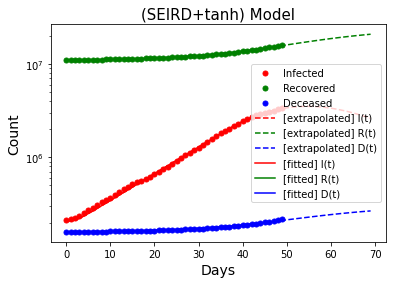

In [20]:
plt.figure(figsize=(6,4))
plt.title('(SEIRD+tanh) Model',fontsize=15)
plt.plot(days, data['infected'],'.',markersize=10,c='r',label='Infected')
plt.plot(days, data['Recovered'],'.',markersize=10,c='g',label='Recovered')
plt.plot(days, data['Death'],'.',markersize=10,c='b',label='Deceased')
plt.plot(m.y[2], '--',c='r',label='[extrapolated] I(t)')
plt.plot(m.y[3], '--',c='g',label='[extrapolated] R(t)')
plt.plot(m.y[4], '--',c='b',label='[extrapolated] D(t)')
plt.plot(d.y[2],c='r',label='[fitted] I(t)')
plt.plot(d.y[3],c='g',label='[fitted] R(t)')
plt.plot(d.y[4],c='b',label='[fitted] D(t)')
plt.yscale('log')
plt.xlabel('Days', fontsize=14) 
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()